<a href="https://colab.research.google.com/github/AzaamAhmed/ML-Projects/blob/main/f_fce_exp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
#for processing the image
import cv2
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import string
import pandas as pd
#for building the model
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import models,layers
from keras.utils import to_categorical

In [41]:
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

In [37]:
df='/content/face_exp/data'

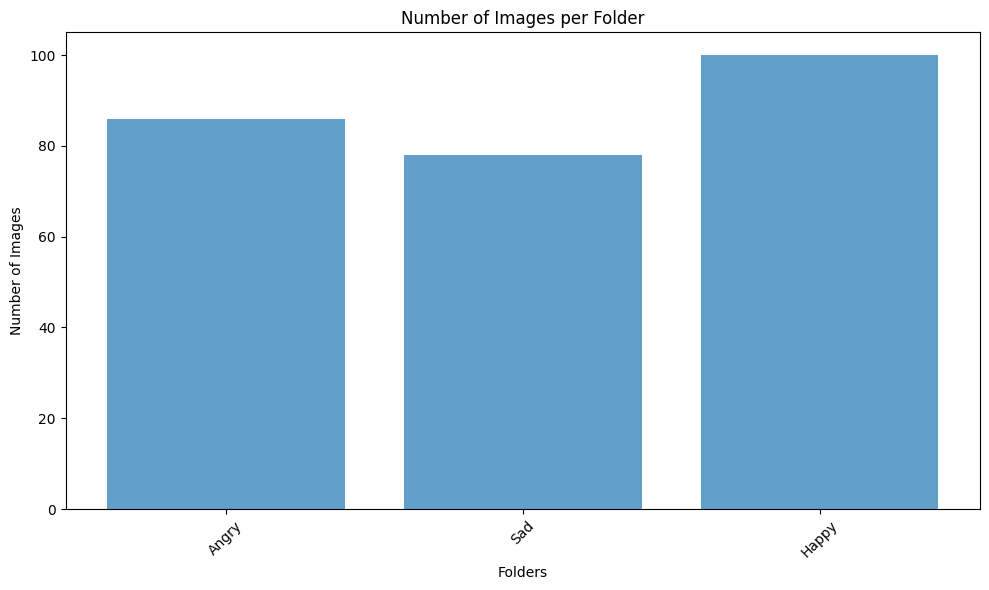

In [42]:
# Directory containing folders with images
root_dir = "/content/face_exp/data"

# Dictionary to store counts for each folder
folder_counts = {}

# Iterate through each folder in the root directory
for folder in os.listdir(root_dir):
    folder_path = os.path.join(root_dir, folder)
    # Check if the item is a directory
    if os.path.isdir(folder_path):
        # Count the number of image files in the folder
        num_images = len([name for name in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, name)) and name.lower().endswith(('.png', '.jpg', '.jpeg'))])
        folder_counts[folder] = num_images

# Extract folder names and corresponding counts
folders = list(folder_counts.keys())
counts = list(folder_counts.values())

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(range(len(folders)), counts, align='center', alpha=0.7)
plt.xticks(range(len(folders)), folders, rotation=45)
plt.xlabel('Folders')
plt.ylabel('Number of Images')
plt.title('Number of Images per Folder')
plt.tight_layout()
plt.show()

In [44]:
Angry = os.listdir(os.path.join(df, '/content/face_exp/data/Angry'))

Happy = os.listdir(os.path.join(df, '/content/face_exp/data/Happy'))

Sad = os.listdir(os.path.join(df, '/content/face_exp/data/Sad'))

In [45]:
X=[] #holding data
Y=[] #label

In [47]:
#Resizing and turning the images in Benign into numpy method
for i, image_name in enumerate(Angry):
    file_path = os.path.join(df, '/content/face_exp/data/Angry', image_name)
    image = Image.open(file_path)
    image = image.resize((64, 64), resample=Image.BOX)
    X.append(np.array(image))
    Y.append(0)

In [48]:
#Resizing and turning the images in Benign into numpy method
for i, image_name in enumerate(Happy):
    file_path = os.path.join(df, '/content/face_exp/data/Happy', image_name)
    image = Image.open(file_path)
    image = image.resize((64, 64), resample=Image.BOX)
    X.append(np.array(image))
    Y.append(1)

In [49]:
#Resizing and turning the images in Benign into numpy method
for i, image_name in enumerate(Sad):
    file_path = os.path.join(df, '/content/face_exp/data/Sad', image_name)
    image = Image.open(file_path)
    image = image.resize((64, 64), resample=Image.BOX)
    X.append(np.array(image))
    Y.append(2)

array([[[ 72,  91, 121],
        [123, 139, 172],
        [141, 154, 189],
        ...,
        [110,  94,  17],
        [108,  86,  19],
        [ 87,  78,  59]],

       [[113, 130, 161],
        [134, 150, 183],
        [141, 155, 190],
        ...,
        [106,  87,  15],
        [103,  83,  13],
        [103,  95,  79]],

       [[129, 144, 175],
        [137, 152, 185],
        [145, 160, 194],
        ...,
        [107,  88,  16],
        [ 96,  80,  15],
        [121, 114, 103]],

       ...,

       [[ 12,   9,  10],
        [  9,  26,  34],
        [  1,  27,  55],
        ...,
        [133, 132, 145],
        [109, 115, 132],
        [ 98, 102, 116]],

       [[  6,   8,   9],
        [  8,  27,  32],
        [ 11,  27,  41],
        ...,
        [131, 125, 134],
        [114, 113, 130],
        [135, 137, 158]],

       [[  4,   7,   5],
        [  7,  26,  37],
        [  8,  34,  51],
        ...,
        [100,  91,  88],
        [113, 107, 111],
        [126, 123, 132]]], dtype=uint8)
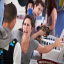

In [50]:
X[1]

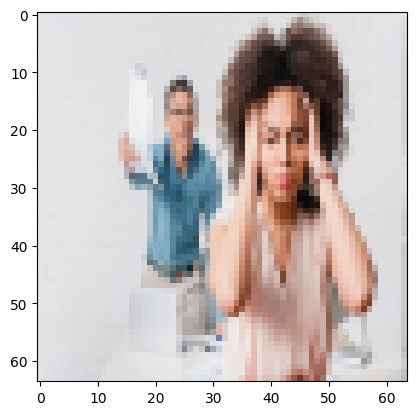

In [51]:
#X[5] is a NumPy array representing an image
image_array = X[5]

# Display the image
plt.imshow(image_array)
plt.show()

In [52]:
#seeing the length of Y
len(Y)

265

In [53]:
#seeing the length of X
len(X)

265

In [54]:
# Resize images to a common size and convert to NumPy array
resized_images = []
for img in X:
    # Check if the image has 3 channels (indicating RGB), and resize if needed
    if len(img.shape) == 3 and img.shape[2] == 3:
        img = Image.fromarray(img)
        img = img.resize((64, 64))  # Resize images to a common size
        resized_images.append(np.array(img))
    else:
        print(f"Ignoring image with shape: {img.shape}")

# Convert the list of resized images into a NumPy array
X = np.array(resized_images)

# Now X should have a homogeneous shape
print("The shape of X",X.shape)

Ignoring image with shape: (64, 64, 4)
Ignoring image with shape: (64, 64, 4)
Ignoring image with shape: (64, 64)
Ignoring image with shape: (64, 64, 4)
Ignoring image with shape: (64, 64)
Ignoring image with shape: (64, 64, 4)
Ignoring image with shape: (64, 64, 4)
Ignoring image with shape: (64, 64, 4)
Ignoring image with shape: (64, 64, 4)
Ignoring image with shape: (64, 64, 4)
Ignoring image with shape: (64, 64, 4)
Ignoring image with shape: (64, 64, 4)
Ignoring image with shape: (64, 64)
Ignoring image with shape: (64, 64)
Ignoring image with shape: (64, 64, 4)
Ignoring image with shape: (64, 64, 4)
Ignoring image with shape: (64, 64, 4)
Ignoring image with shape: (64, 64)
Ignoring image with shape: (64, 64, 4)
Ignoring image with shape: (64, 64)
Ignoring image with shape: (64, 64)
Ignoring image with shape: (64, 64)
Ignoring image with shape: (64, 64)
The shape of X (242, 64, 64, 3)


In [55]:
X.shape

(242, 64, 64, 3)

In [56]:
# Check the number of samples in X and Y
print("Number of samples in X:", len(X))
print("Number of samples in Y:", len(Y))

Number of samples in X: 242
Number of samples in Y: 265


In [57]:
# making the number of samples in X matches the number of samples in Y
min_samples = min(len(X), len(Y))
X = X[:min_samples]
Y = Y[:min_samples]

In [58]:
# Check the number of samples in X and Y
print("Number of samples in X:", len(X))
print("Number of samples in Y:", len(Y))

Number of samples in X: 242
Number of samples in Y: 242


In [59]:
# Split the dataset for training and testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [89]:
#shape of x_train & y_train
#we will see the number of images will do training(194) and the size(64,64) and the channels(RGB)
print(f"({x_train.shape[0]}, {x_train.shape[1]}, {x_train.shape[2]}, {x_train.shape[3]})")
print(f"({y_train.shape[0]},)")

(193, 64, 64, 3)
(193,)


In [90]:
#shape of x_test & y_test
#we will see the number of images will do testing(49) and the size(64,64) and the channels(RGB)
print(f"({x_test.shape[0]}, {x_test.shape[1]}, {x_test.shape[2]}, {x_test.shape[3]})")
print(f"({y_test.shape[0]},)")

(49, 64, 64, 3)
(49,)


In [62]:
# Find the unique classes in y_train
unique_classes_train = np.unique(y_train)
print("Unique classes in y_train:", unique_classes_train)

# Find the unique classes in y_test
unique_classes_test = np.unique(y_test)
print("Unique classes in y_test:", unique_classes_test)

Unique classes in y_train: [0 1 2]
Unique classes in y_test: [0 1 2]


In [63]:
# Convert y_train and y_test to one-hot encoded format
y_train = to_categorical(y_train , num_classes=3)
y_test = to_categorical(y_test , num_classes=3)

In [65]:
y_train[:10]

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [66]:
y_train[:10]

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [67]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout

# Define the number of classes
num_classes = 3

# Define a sequential model
model = Sequential()

# Layer 1
model.add(Conv2D(32, (3,3), padding='same', input_shape=(64, 64, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Layer 2
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Layer 3
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


# Flatten layer to convert the 3D feature maps to 1D
model.add(Flatten())

# Dense layer with 64 neurons and ReLU activation
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Output layer with the number of neurons equal to the number of classes and softmax activation for multi-class classification
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Compile the model with categorical crossentropy loss, Adam optimizer, and accuracy metric
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Train the model on the training data
batch_size = 32  # Define your batch size
history=model.fit(x_train, y_train, batch_size=batch_size, verbose=1, epochs=50, validation_data=(x_test, y_test), shuffle=False)

# Save the trained model to a file
model.save('Face_emotion_classification.h5')

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 195ms/step - accuracy: 0.3962 - loss: 40.7456 - val_accuracy: 0.3469 - val_loss: 2.2833
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 269ms/step - accuracy: 0.3401 - loss: 3.1847 - val_accuracy: 0.4694 - val_loss: 1.0171
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 216ms/step - accuracy: 0.4191 - loss: 1.0568 - val_accuracy: 0.4694 - val_loss: 1.0992
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step - accuracy: 0.4122 - loss: 1.0876 - val_accuracy: 0.4694 - val_loss: 1.1049
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step - accuracy: 0.4191 - loss: 1.0883 - val_accuracy: 0.4694 - val_loss: 1.0963
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step - accuracy: 0.4122 - loss: 1.0971 - val_accuracy: 0.4694 - val_loss: 1.0953
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step - accuracy: 0.4122 - loss: 1.0965 - val_accuracy: 0.4694 - val_loss: 1.0942
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step - accuracy: 0.4191 - loss: 1.0924 - val_accuracy: 0.4694 - val_loss

In [68]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

# Print the model's performance
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy*100:.2f}%')

Test Loss: 1.0596
Test Accuracy: 46.94%


In [69]:
from sklearn.metrics import classification_report, confusion_matrix

# Convert one-hot encoded y_test back to categorical labels
y_test_labels = np.argmax(y_test, axis=1)

# Get the model predictions on the test data
y_pred = np.argmax(model.predict(x_test), axis=1)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test_labels, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.47      1.00      0.64        23
           2       0.00      0.00      0.00         9

    accuracy                           0.47        49
   macro avg       0.16      0.33      0.21        49
weighted avg       0.22      0.47      0.30        49

Confusion Matrix:
[[ 0 17  0]
 [ 0 23  0]
 [ 0  9  0]]


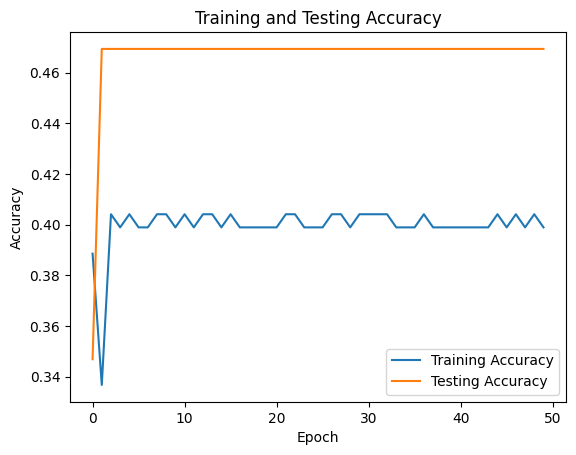

In [70]:
# Plotting training and testing accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()
plt.show()

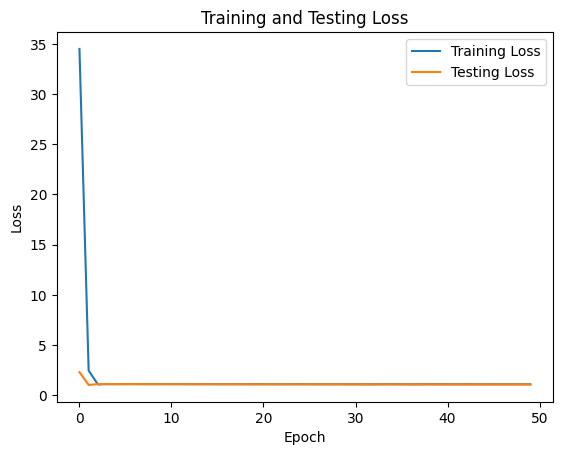

In [71]:
# Plot the training and testing loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.show()

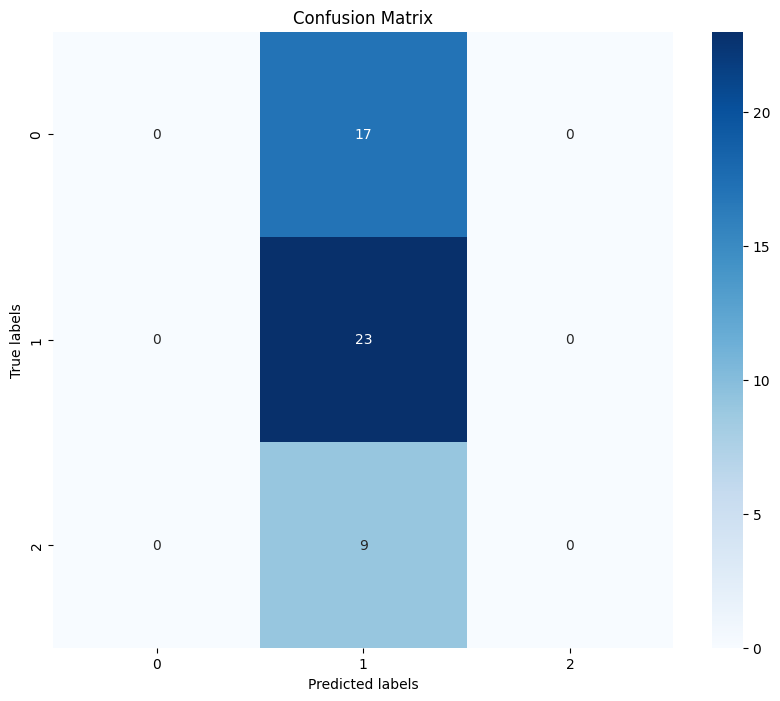

In [72]:
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


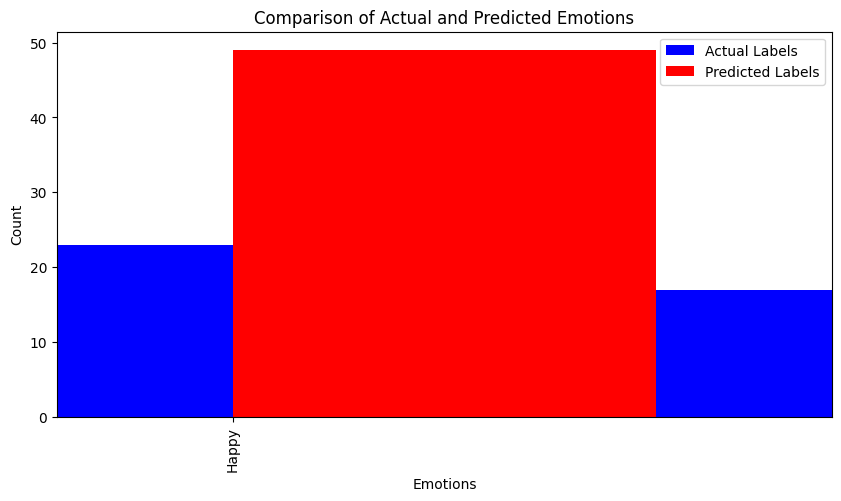

In [73]:
# Load the trained model
model = tf.keras.models.load_model('Face_emotion_classification.h5')

# Predict labels using the CNN model
predicted_probabilities = model.predict(x_test)
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Convert the NumPy array of predicted labels to a pandas Series
predicted_series = pd.Series(predicted_labels)

# Get value counts of actual labels
actual_counts = np.argmax(y_test, axis=1)
actual_counts = pd.Series(actual_counts).value_counts()

# Get value counts of predicted labels
predicted_counts = predicted_series.value_counts()

# Create a bar plot
plt.figure(figsize=(10, 5))

# Define emotion labels
emotion_labels = ['Angry', 'Happy', 'Sad']

# Plot actual labels
actual_counts.index = [emotion_labels[label] for label in actual_counts.index]
actual_counts.plot(kind='bar', color='blue', width=0.6, position=1, label='Actual Labels')

# Plot predicted labels
predicted_counts.index = [emotion_labels[label] for label in predicted_counts.index]
predicted_counts.plot(kind='bar', color='red', width=0.6, position=0, label='Predicted Labels')

plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Comparison of Actual and Predicted Emotions')
plt.legend()
plt.show()

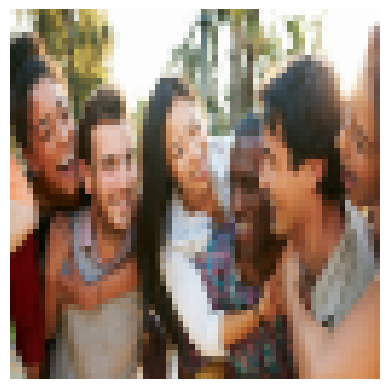

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
Actual class: Happy
Predicted class: Happy


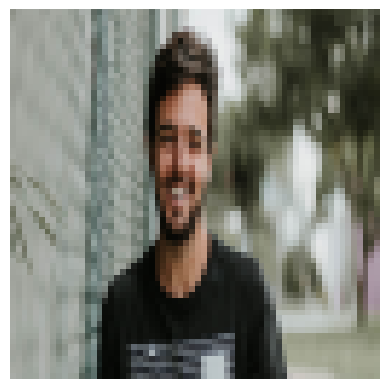

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Actual class: Happy
Predicted class: Happy


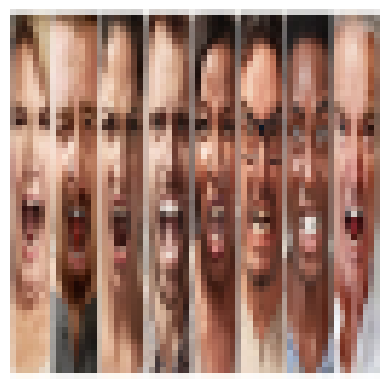

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Actual class: Angry
Predicted class: Happy


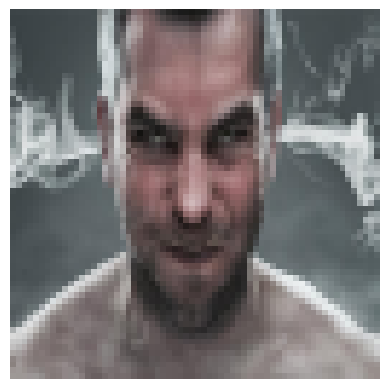

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Actual class: Angry
Predicted class: Happy


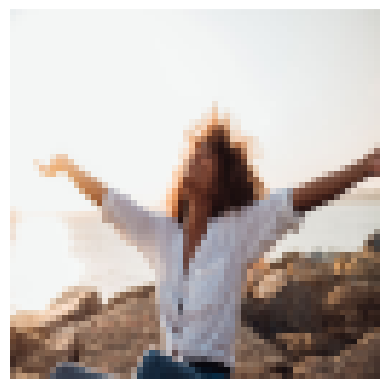

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Actual class: Happy
Predicted class: Happy


In [74]:
# Load the trained model
model = tf.keras.models.load_model('Face_emotion_classification.h5')

# Iterate over the first 20 images in x_test
for i in range(5):
    # Get the ith image and its actual label
    current_image = x_test[i]
    actual_label = y_test[i]

    # Display the image
    plt.imshow(current_image)
    plt.axis('off')
    plt.show()

    # Get the model's prediction for the current image
    batch_prediction = model.predict(np.expand_dims(current_image, axis=0))
    predicted_label = np.argmax(batch_prediction)

    # Map predicted label to class name
    if predicted_label == 0:
        predicted_class = "Angry"
    elif predicted_label == 1:
        predicted_class = "Happy"
    else:
        predicted_class = "Sad"

    # Map actual label to class name
    actual_label = np.argmax(actual_label)
    if actual_label == 0:
        actual_class = "Angry"
    elif actual_label == 1:
        actual_class = "Happy"
    else:
        actual_class = "Sad"

    # Print actual and predicted classes
    print("Actual class:", actual_class)
    print("Predicted class:", predicted_class)

In [75]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Define the new model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
batch_size = 32  # Define your batch size
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=20, validation_data=(x_test, y_test), verbose=1, callbacks=[early_stopping])

# Save the trained model to a file
model.save('ResNet_Face_emotion_classification.h5')

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.3756 - loss: 2.7656 - val_accuracy: 0.3878 - val_loss: 1.7659
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 589ms/step - accuracy: 0.5708 - loss: 1.3353 - val_accuracy: 0.5714 - val_loss: 1.0774
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 675ms/step - accuracy: 0.6271 - loss: 0.9140 - val_accuracy: 0.5918 - val_loss: 1.0220
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 588ms/step - accuracy: 0.6579 - loss: 0.7984 - val_accuracy: 0.6327 - val_loss: 0.9762
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 593ms/step - accuracy: 0.7341 - loss: 0.6332 - val_accuracy: 0.6122 - val_loss: 0.9602
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 580ms/step - accuracy: 0.7516 - loss: 0.5717 - val_accuracy: 0.5510 - val_loss: 0.9940
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 477ms/step - accuracy: 0.7502 - loss: 0.5313 - val_accuracy: 0.6735 - val_loss: 0.9899
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 669ms/step - accuracy: 0.7903 

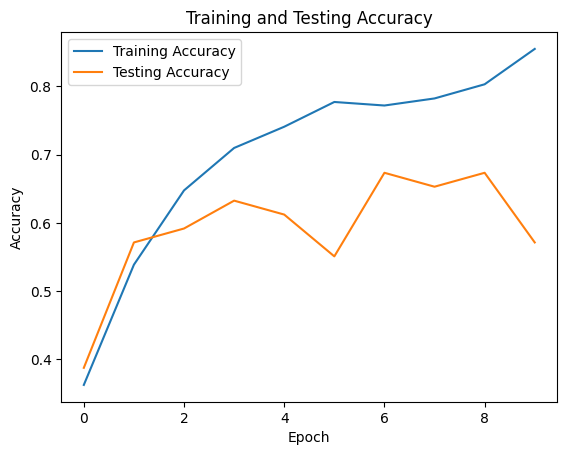

In [76]:
# Plotting training and testing accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()
plt.show()

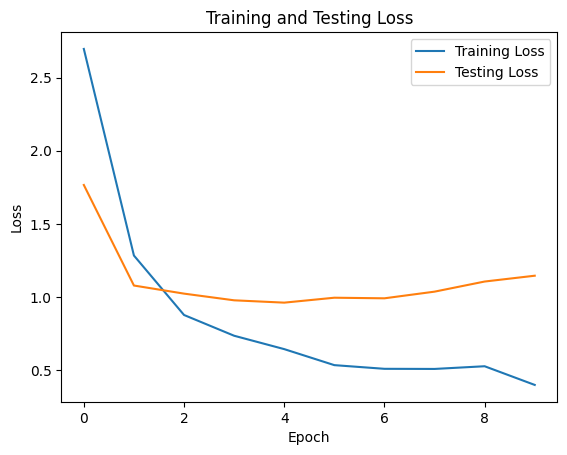

In [77]:
# Plot the training and testing loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.show()

In [78]:
# Convert one-hot encoded y_test back to categorical labels
y_test_labels = np.argmax(y_test, axis=1)

# Get the model predictions on the test data
y_pred = np.argmax(model.predict(x_test), axis=1)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test_labels, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.65      0.65        17
           1       0.72      0.57      0.63        23
           2       0.43      0.67      0.52         9

    accuracy                           0.61        49
   macro avg       0.60      0.63      0.60        49
weighted avg       0.64      0.61      0.62        49

Confusion Matrix:
[[11  4  2]
 [ 4 13  6]
 [ 2  1  6]]


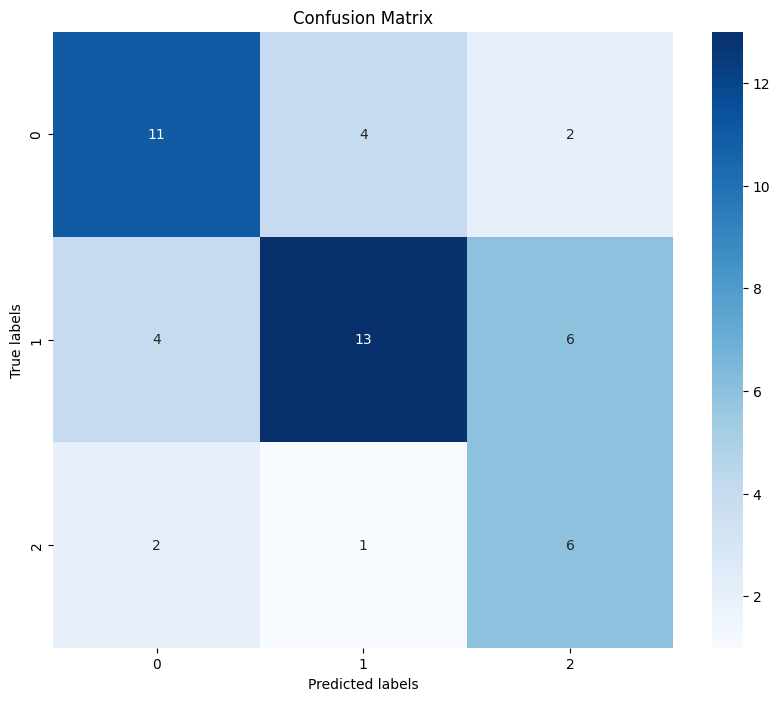

In [79]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 7s/step


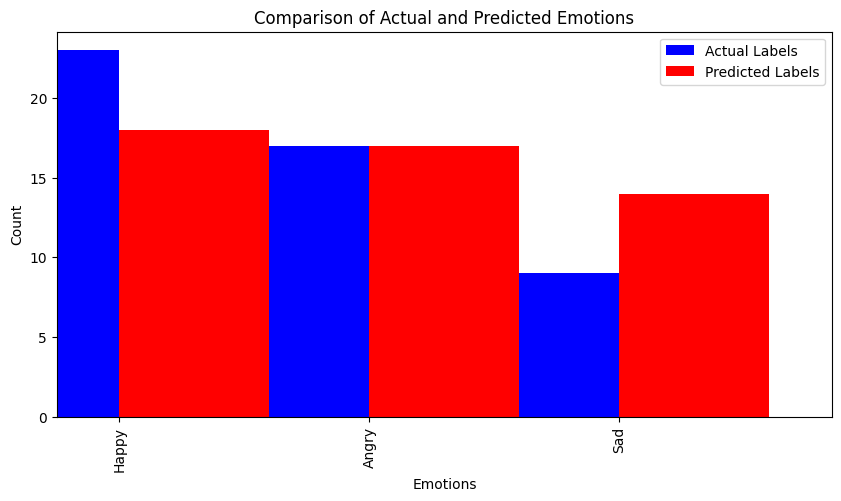

In [80]:
# Load the trained model
model = tf.keras.models.load_model('ResNet_Face_emotion_classification.h5')

# Predict labels using the CNN model
predicted_probabilities = model.predict(x_test)
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Convert the NumPy array of predicted labels to a pandas Series
predicted_series = pd.Series(predicted_labels)

# Get value counts of actual labels
actual_counts = np.argmax(y_test, axis=1)
actual_counts = pd.Series(actual_counts).value_counts()

# Get value counts of predicted labels
predicted_counts = predicted_series.value_counts()

# Create a bar plot
plt.figure(figsize=(10, 5))

# Define emotion labels
emotion_labels = ['Angry', 'Happy', 'Sad']

# Plot actual labels
actual_counts.index = [emotion_labels[label] for label in actual_counts.index]
actual_counts.plot(kind='bar', color='blue', width=0.6, position=1, label='Actual Labels')

# Plot predicted labels
predicted_counts.index = [emotion_labels[label] for label in predicted_counts.index]
predicted_counts.plot(kind='bar', color='red', width=0.6, position=0, label='Predicted Labels')

plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Comparison of Actual and Predicted Emotions')
plt.legend()
plt.show()

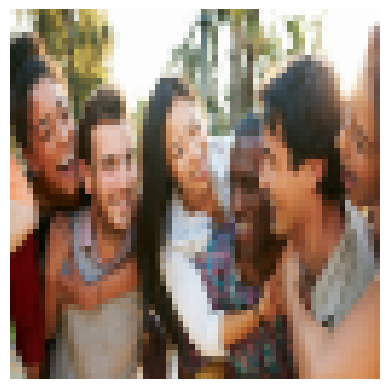

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Actual class: Happy
Predicted class: Happy


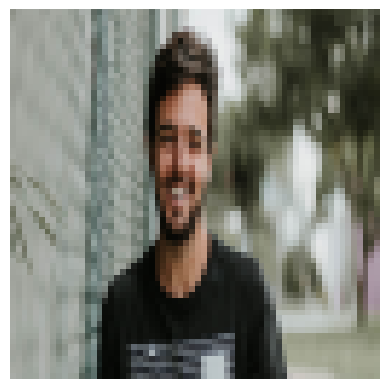

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Actual class: Happy
Predicted class: Angry


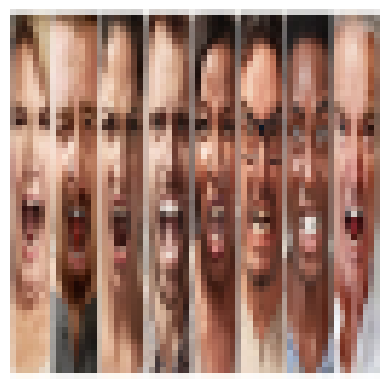

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Actual class: Angry
Predicted class: Happy


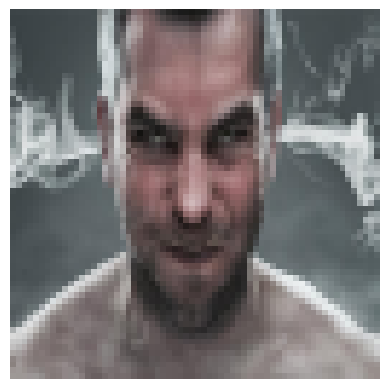

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Actual class: Angry
Predicted class: Sad


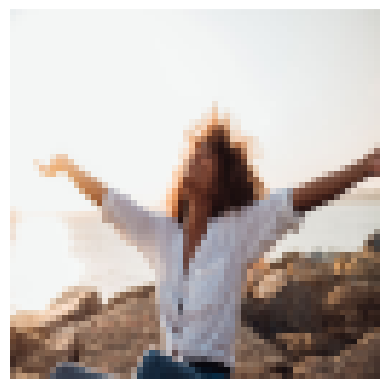

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Actual class: Happy
Predicted class: Happy


In [81]:
# Load the trained model
model = tf.keras.models.load_model('ResNet_Face_emotion_classification.h5')

# Iterate over the first 20 images in x_test
for i in range(5):
    # Get the ith image and its actual label
    current_image = x_test[i]
    actual_label = y_test[i]

    # Display the image
    plt.imshow(current_image)
    plt.axis('off')
    plt.show()

    # Get the model's prediction for the current image
    batch_prediction = model.predict(np.expand_dims(current_image, axis=0))
    predicted_label = np.argmax(batch_prediction)

    # Map predicted label to class name
    if predicted_label == 0:
        predicted_class = "Angry"
    elif predicted_label == 1:
        predicted_class = "Happy"
    else:
        predicted_class = "Sad"

    # Map actual label to class name
    actual_label = np.argmax(actual_label)
    if actual_label == 0:
        actual_class = "Angry"
    elif actual_label == 1:
        actual_class = "Happy"
    else:
        actual_class = "Sad"

    # Print actual and predicted classes
    print("Actual class:", actual_class)
    print("Predicted class:", predicted_class)

In [82]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define the number of classes
num_classes = 3

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Define the new model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
batch_size = 32  # Define your batch size
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=20, validation_data=(x_test, y_test), verbose=1, callbacks=[early_stopping])

# Save the trained model to a file
model.save('VGG16_Face_emotion_classification.h5')

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.3167 - loss: 16.7524 - val_accuracy: 0.4082 - val_loss: 7.0242
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.3753 - loss: 13.6510 - val_accuracy: 0.5102 - val_loss: 4.7868
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.4935 - loss: 8.2216 - val_accuracy: 0.5306 - val_loss: 3.3225
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.4864 - loss: 7.3966 - val_accuracy: 0.5918 - val_loss: 3.3225
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.5689 - loss: 4.5742 - val_accuracy: 0.6327 - val_loss: 3.2860
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.5806 - loss: 3.9735 - val_accuracy: 0.6122 - val_loss: 3.0786
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.7160 - loss: 2.4359 - val_accuracy: 0.6122 - val_loss: 2.9060
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.6587 - loss: 3.11

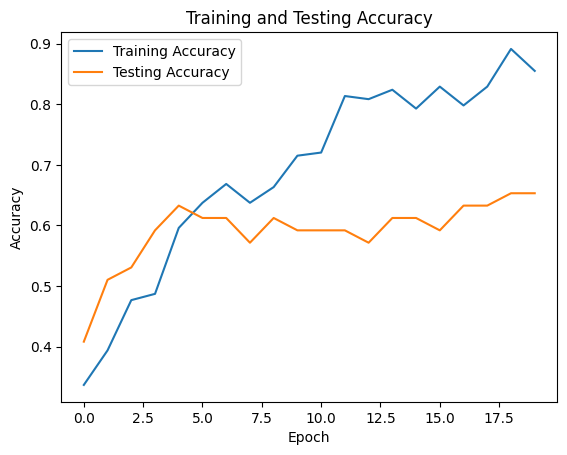

In [83]:
# Plotting training and testing accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()
plt.show()

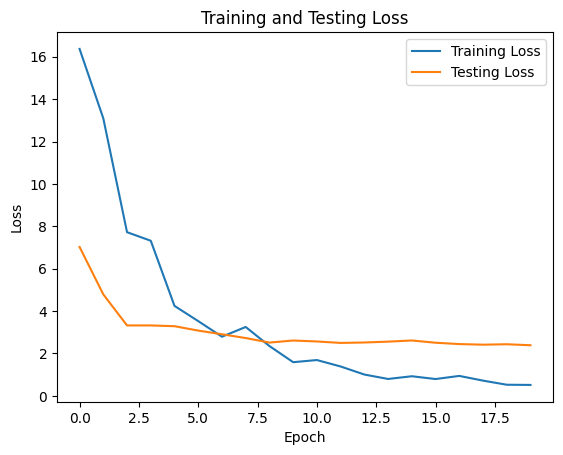

In [84]:
# Plot the training and testing loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.show()

In [85]:
# Convert one-hot encoded y_test back to categorical labels
y_test_labels = np.argmax(y_test, axis=1)

# Get the model predictions on the test data
y_pred = np.argmax(model.predict(x_test), axis=1)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test_labels, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 952ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.71      0.67        17
           1       0.78      0.61      0.68        23
           2       0.50      0.67      0.57         9

    accuracy                           0.65        49
   macro avg       0.64      0.66      0.64        49
weighted avg       0.68      0.65      0.66        49

Confusion Matrix:
[[12  3  2]
 [ 5 14  4]
 [ 2  1  6]]


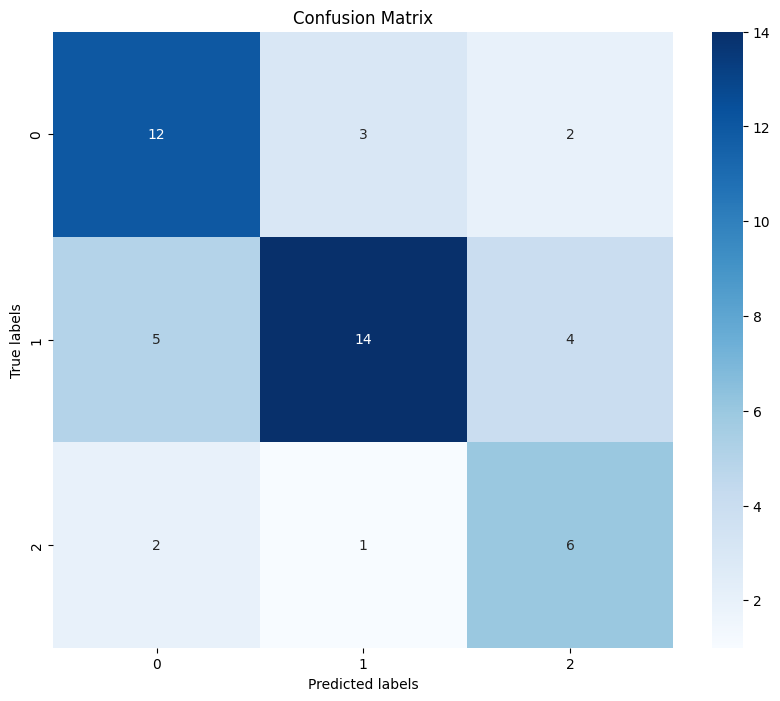

In [86]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step


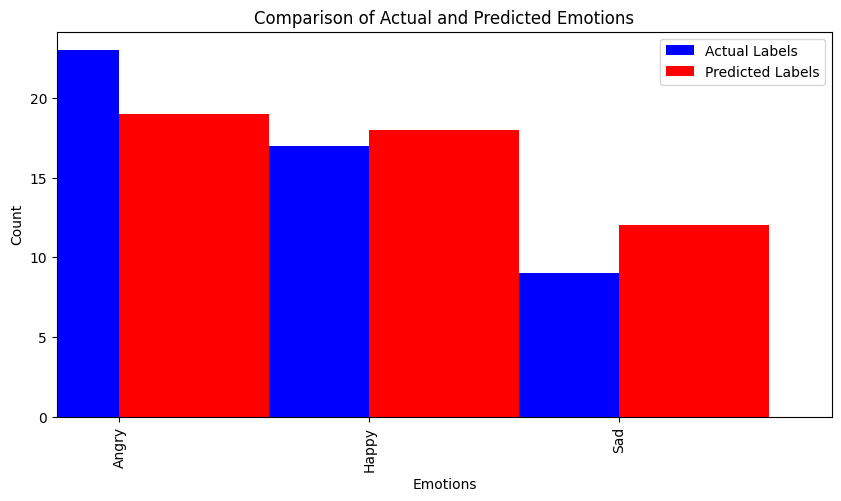

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the trained model
model = tf.keras.models.load_model('VGG16_Face_emotion_classification.h5')

# Predict labels using the CNN model
predicted_probabilities = model.predict(x_test)
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Convert the NumPy array of predicted labels to a pandas Series
predicted_series = pd.Series(predicted_labels)

# Get value counts of actual labels
actual_counts = np.argmax(y_test, axis=1)
actual_counts = pd.Series(actual_counts).value_counts()

# Get value counts of predicted labels
predicted_counts = predicted_series.value_counts()

# Create a bar plot
plt.figure(figsize=(10, 5))

# Define emotion labels
emotion_labels = ['Angry', 'Happy', 'Sad']

# Plot actual labels
actual_counts.index = [emotion_labels[label] for label in actual_counts.index]
actual_counts.plot(kind='bar', color='blue', width=0.6, position=1, label='Actual Labels')

# Plot predicted labels
predicted_counts.index = [emotion_labels[label] for label in predicted_counts.index]
predicted_counts.plot(kind='bar', color='red', width=0.6, position=0, label='Predicted Labels')

plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Comparison of Actual and Predicted Emotions')
plt.legend()
plt.show()

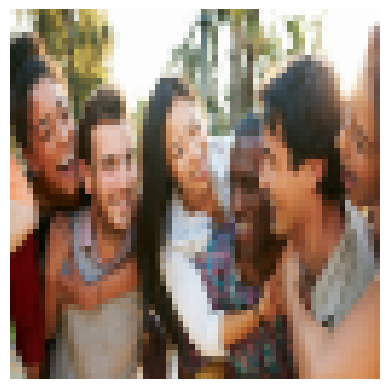

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
Actual class: Happy
Predicted class: Happy


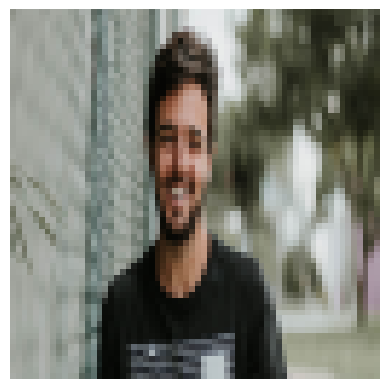

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Actual class: Happy
Predicted class: Happy


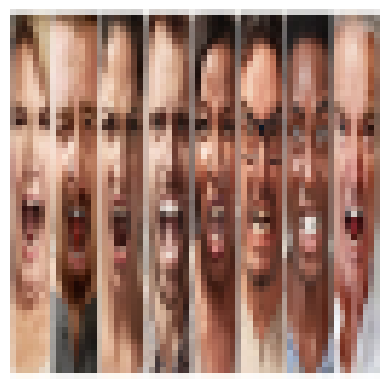

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Actual class: Angry
Predicted class: Sad


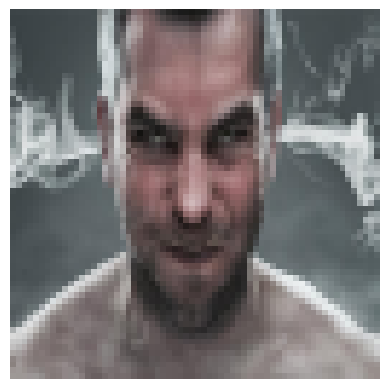

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Actual class: Angry
Predicted class: Sad


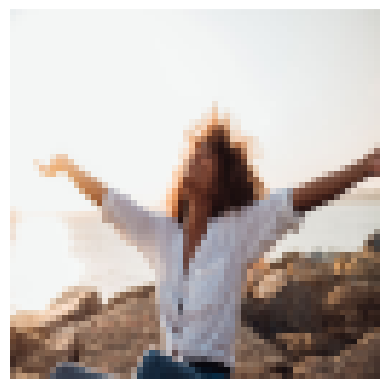

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Actual class: Happy
Predicted class: Sad


In [88]:
# Load the trained model
model = tf.keras.models.load_model('VGG16_Face_emotion_classification.h5')

# Iterate over the first 20 images in x_test
for i in range(5):
    # Get the ith image and its actual label
    current_image = x_test[i]
    actual_label = y_test[i]

    # Display the image
    plt.imshow(current_image)
    plt.axis('off')
    plt.show()

    # Get the model's prediction for the current image
    batch_prediction = model.predict(np.expand_dims(current_image, axis=0))
    predicted_label = np.argmax(batch_prediction)

    # Map predicted label to class name
    if predicted_label == 0:
        predicted_class = "Angry"
    elif predicted_label == 1:
        predicted_class = "Happy"
    else:
        predicted_class = "Sad"

    # Map actual label to class name
    actual_label = np.argmax(actual_label)
    if actual_label == 0:
        actual_class = "Angry"
    elif actual_label == 1:
        actual_class = "Happy"
    else:
        actual_class = "Sad"

    # Print actual and predicted classes
    print("Actual class:", actual_class)
    print("Predicted class:", predicted_class)